In [55]:
import pandas as pd
import os
import numpy as np
from sklearn import preprocessing

In [56]:
data = pd.read_csv('C:\\Users\\Shamir\\PycharmProjects\\future eye\\Overall_Training_Data_30July2019_v0.1.csv')

In [57]:
#Checkng the shape of the data
data.shape

(1550, 35)

In [58]:
#Example of the data
data.head()

,Unnamed: 0,TimeStamp,AF3_THETA,AF3_ALPHA,AF3_LOW_BETA,AF3_HIGH_BETA,AF3_GAMMA,T7_THETA,T7_ALPHA,T7_LOW_BETA,...,AF4_HIGH_BETA,AF4_GAMMA,CQ_AF3,CQ_T7,CQ_Pz,CQ_T8,CQ_AF4,TimeStamp_Readable,seconds_of_timestamp,Label
0,449,1563945527,1602.004637,820.143124,468.603529,312.692672,43.838238,1.113403,3.143814,3.228099,...,321.680915,43.443617,4,0,4,2,2,18:47.1,47,1
1,450,1563945527,1648.410749,1027.630001,543.252317,273.849371,47.554865,1.187707,3.543250,3.267439,...,275.556757,46.710437,4,0,4,2,2,18:47.2,47,1
2,451,1563945527,1605.193182,1189.284067,630.953231,250.604223,52.334560,1.174995,3.800832,3.285394,...,247.283044,51.381376,4,0,4,2,2,18:47.3,47,1
3,452,1563945527,1462.585805,1264.364852,703.198872,249.608310,57.832213,1.237306,3.847343,3.329154,...,242.736111,57.083412,4,0,4,2,2,18:47.5,47,1
4,453,1563945528,1305.079769,1264.657727,762.149646,275.511102,63.599263,1.214110,3.735482,3.538992,...,265.861959,63.196649,4,0,1,4,4,18:47.6,47,1


In [59]:
#information about each attribute
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1550 entries, 0 to 1549
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            1550 non-null   int64  
 1   TimeStamp             1550 non-null   int64  
 2   AF3_THETA             1550 non-null   float64
 3   AF3_ALPHA             1550 non-null   float64
 4   AF3_LOW_BETA          1550 non-null   float64
 5   AF3_HIGH_BETA         1550 non-null   float64
 6   AF3_GAMMA             1550 non-null   float64
 7   T7_THETA              1550 non-null   float64
 8   T7_ALPHA              1550 non-null   float64
 9   T7_LOW_BETA           1550 non-null   float64
 10  T7_HIGH_BETA          1550 non-null   float64
 11  T7_GAMMA              1550 non-null   float64
 12  Pz_THETA              1550 non-null   float64
 13  Pz_ALPHA              1550 non-null   float64
 14  Pz_LOW_BETA           1550 non-null   float64
 15  Pz_HIGH_BETA         

In [60]:
data.describe()

,Unnamed: 0,TimeStamp,AF3_THETA,AF3_ALPHA,AF3_LOW_BETA,AF3_HIGH_BETA,AF3_GAMMA,T7_THETA,T7_ALPHA,T7_LOW_BETA,...,AF4_LOW_BETA,AF4_HIGH_BETA,AF4_GAMMA,CQ_AF3,CQ_T7,CQ_Pz,CQ_T8,CQ_AF4,seconds_of_timestamp,Label
count,1550.000000,1.550000e+03,1550.000000,1550.000000,1550.000000,1550.000000,1550.000000,1550.000000,1550.000000,1550.000000,...,1550.000000,1550.000000,1550.000000,1550.000000,1550.000000,1550.000000,1550.000000,1550.000000,1550.000000,1550.000000
mean,1114.807097,1.564145e+09,1549.064953,650.558935,251.449355,79.770908,18.621272,57.545559,11.945923,5.659711,...,239.277757,77.028814,16.570991,3.824516,2.140000,1.970323,3.863871,3.820645,27.116129,2.494839
std,329.877542,9.984974e+04,8057.989865,3348.831447,1255.027448,403.163899,90.477763,410.407526,109.756889,38.754052,...,1197.815250,399.503613,90.458850,0.714269,1.667023,1.701902,0.607823,0.724085,16.528769,1.119537
min,449.000000,1.563946e+09,0.001542,0.000756,0.000428,0.000373,0.000113,0.124150,0.127748,0.052506,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,809.250000,1.564194e+09,7.485803,3.910045,2.569978,1.736854,1.199417,0.642321,0.636984,0.583449,...,2.156875,1.581896,1.038773,4.000000,1.000000,0.000000,4.000000,4.000000,13.000000,1.000000
50%,1180.500000,1.564194e+09,17.506139,6.748391,4.740691,3.383892,2.416862,1.203127,1.193747,0.967019,...,4.035095,2.593284,2.167698,4.000000,1.000000,2.000000,4.000000,4.000000,25.000000,2.000000
75%,1382.750000,1.564195e+09,46.821041,13.160046,8.797218,8.473603,7.813450,2.190947,2.294018,2.303781,...,7.414548,4.990787,4.734957,4.000000,4.000000,4.000000,4.000000,4.000000,41.000000,3.000000
max,1681.000000,1.564197e+09,90293.425120,34604.705590,10233.842950,4883.002471,1434.346143,7267.583591,2039.531480,708.018749,...,10029.288400,4903.277441,1440.991202,4.000000,4.000000,4.000000,4.000000,4.000000,59.000000,4.000000


In [61]:
data.isnull().sum()

Unnamed: 0              0
TimeStamp               0
AF3_THETA               0
AF3_ALPHA               0
AF3_LOW_BETA            0
AF3_HIGH_BETA           0
AF3_GAMMA               0
T7_THETA                0
T7_ALPHA                0
T7_LOW_BETA             0
T7_HIGH_BETA            0
T7_GAMMA                0
Pz_THETA                0
Pz_ALPHA                0
Pz_LOW_BETA             0
Pz_HIGH_BETA            0
Pz_GAMMA                0
T8_THETA                0
T8_ALPHA                0
T8_LOW_BETA             0
T8_HIGH_BETA            0
T8_GAMMA                0
AF4_THETA               0
AF4_ALPHA               0
AF4_LOW_BETA            0
AF4_HIGH_BETA           0
AF4_GAMMA               0
CQ_AF3                  0
CQ_T7                   0
CQ_Pz                   0
CQ_T8                   0
CQ_AF4                  0
TimeStamp_Readable      0
seconds_of_timestamp    0
Label                   0
dtype: int64

In [62]:
#Shuffling the data for better results
data=data.reindex(np.random.permutation(data.index))

In [63]:
data


,Unnamed: 0,TimeStamp,AF3_THETA,AF3_ALPHA,AF3_LOW_BETA,AF3_HIGH_BETA,AF3_GAMMA,T7_THETA,T7_ALPHA,T7_LOW_BETA,...,AF4_HIGH_BETA,AF4_GAMMA,CQ_AF3,CQ_T7,CQ_Pz,CQ_T8,CQ_AF4,TimeStamp_Readable,seconds_of_timestamp,Label
1285,1363,1564196532,20.766682,8.137793,3.085862,0.946705,0.353597,11.302749,2.984728,2.523417,...,1.047950,0.250907,4,4,4,4,4,02:11.8,11,1
310,1105,1564194455,12.747275,15.494552,6.291507,8.660703,5.253748,0.394334,2.294109,0.301119,...,9.282591,6.705745,4,1,1,4,4,27:35.2,35,1
255,758,1563945566,3.237282,2.092974,5.363847,1.784419,1.571705,0.591078,0.442041,0.683825,...,1.743018,1.623155,4,0,4,4,4,19:26.0,26,4
515,1346,1564194486,25.215521,16.719301,10.566270,8.362882,2.846098,0.670550,1.182027,1.354969,...,10.441175,2.649230,4,1,1,4,4,28:05.5,5,3
1082,1254,1564195457,5.245818,3.695052,7.147625,1.953360,1.780216,1.878942,1.429493,2.700644,...,1.574482,1.192538,4,1,2,4,4,44:16.5,16,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926,1071,1564193871,37.224925,4.949992,5.983196,6.837405,22.121450,0.557133,0.410384,0.646648,...,3.601038,4.785642,4,4,0,4,4,17:50.5,50,4
848,975,1564193858,1.962764,9.649559,7.276595,5.579929,12.009823,0.524914,1.555945,0.448591,...,2.141777,4.507818,4,4,0,4,4,17:38.4,38,3
62,511,1563945535,13025.855830,16965.353780,6164.221432,1555.685241,158.471000,23.500606,80.339831,38.315791,...,1556.465283,153.632431,4,0,2,3,1,18:54.9,54,1
1491,1623,1564196565,81.286627,7.171880,1.434698,0.842386,0.648374,1.462547,1.608540,0.779317,...,0.816843,0.382607,4,4,4,4,4,02:44.6,44,4


In [64]:
y = data['Label']
data = data.drop(['Label','TimeStamp','TimeStamp_Readable','seconds_of_timestamp','CQ_AF3','CQ_T7','CQ_Pz','CQ_T8','CQ_AF4'], axis = 1)


In [65]:
data.head()

,Unnamed: 0,AF3_THETA,AF3_ALPHA,AF3_LOW_BETA,AF3_HIGH_BETA,AF3_GAMMA,T7_THETA,T7_ALPHA,T7_LOW_BETA,T7_HIGH_BETA,...,T8_THETA,T8_ALPHA,T8_LOW_BETA,T8_HIGH_BETA,T8_GAMMA,AF4_THETA,AF4_ALPHA,AF4_LOW_BETA,AF4_HIGH_BETA,AF4_GAMMA
1285,1363,20.766682,8.137793,3.085862,0.946705,0.353597,11.302749,2.984728,2.523417,1.300393,...,3.511739,3.183780,1.152438,1.478918,1.100824,20.026147,8.393178,3.215121,1.047950,0.250907
310,1105,12.747275,15.494552,6.291507,8.660703,5.253748,0.394334,2.294109,0.301119,1.635269,...,14.294587,22.598243,13.768535,10.984409,6.967178,10.114583,25.688707,7.580108,9.282591,6.705745
255,758,3.237282,2.092974,5.363847,1.784419,1.571705,0.591078,0.442041,0.683825,0.662731,...,3.087877,3.173040,5.993323,3.306795,2.049940,3.006738,2.161864,7.033896,1.743018,1.623155
515,1346,25.215521,16.719301,10.566270,8.362882,2.846098,0.670550,1.182027,1.354969,1.341981,...,4.016114,23.840029,15.463198,12.175206,2.914203,4.578981,15.543222,12.685460,10.441175,2.649230
1082,1254,5.245818,3.695052,7.147625,1.953360,1.780216,1.878942,1.429493,2.700644,2.874453,...,7.796679,5.653990,8.244927,2.084410,2.429029,5.684071,3.168362,7.827114,1.574482,1.192538


In [66]:
#dropping the un-named Column
data = data.drop(data.columns[0], axis=1)

In [67]:
x = data

In [68]:
x

,AF3_THETA,AF3_ALPHA,AF3_LOW_BETA,AF3_HIGH_BETA,AF3_GAMMA,T7_THETA,T7_ALPHA,T7_LOW_BETA,T7_HIGH_BETA,T7_GAMMA,...,T8_THETA,T8_ALPHA,T8_LOW_BETA,T8_HIGH_BETA,T8_GAMMA,AF4_THETA,AF4_ALPHA,AF4_LOW_BETA,AF4_HIGH_BETA,AF4_GAMMA
1285,20.766682,8.137793,3.085862,0.946705,0.353597,11.302749,2.984728,2.523417,1.300393,0.619369,...,3.511739,3.183780,1.152438,1.478918,1.100824,20.026147,8.393178,3.215121,1.047950,0.250907
310,12.747275,15.494552,6.291507,8.660703,5.253748,0.394334,2.294109,0.301119,1.635269,1.986793,...,14.294587,22.598243,13.768535,10.984409,6.967178,10.114583,25.688707,7.580108,9.282591,6.705745
255,3.237282,2.092974,5.363847,1.784419,1.571705,0.591078,0.442041,0.683825,0.662731,0.590546,...,3.087877,3.173040,5.993323,3.306795,2.049940,3.006738,2.161864,7.033896,1.743018,1.623155
515,25.215521,16.719301,10.566270,8.362882,2.846098,0.670550,1.182027,1.354969,1.341981,1.318061,...,4.016114,23.840029,15.463198,12.175206,2.914203,4.578981,15.543222,12.685460,10.441175,2.649230
1082,5.245818,3.695052,7.147625,1.953360,1.780216,1.878942,1.429493,2.700644,2.874453,5.274330,...,7.796679,5.653990,8.244927,2.084410,2.429029,5.684071,3.168362,7.827114,1.574482,1.192538
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926,37.224925,4.949992,5.983196,6.837405,22.121450,0.557133,0.410384,0.646648,0.340355,0.791472,...,4.479578,3.353109,2.073275,2.880330,2.808763,42.759976,8.657990,5.685404,3.601038,4.785642
848,1.962764,9.649559,7.276595,5.579929,12.009823,0.524914,1.555945,0.448591,0.574338,1.046752,...,0.985739,5.248756,2.199532,2.644021,3.995536,2.315923,2.171128,1.467831,2.141777,4.507818
62,13025.855830,16965.353780,6164.221432,1555.685241,158.471000,23.500606,80.339831,38.315791,27.329224,6.321310,...,13464.238210,17164.131970,6166.620390,1543.270382,159.255387,11385.630750,15484.772860,5635.889860,1556.465283,153.632431
1491,81.286627,7.171880,1.434698,0.842386,0.648374,1.462547,1.608540,0.779317,0.627229,0.495357,...,3.086268,2.403114,1.502972,1.346004,0.535420,38.656297,3.785195,1.340955,0.816843,0.382607


In [69]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=0)

#X_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2

In [70]:
print("Shape of x_train :", x_train.shape)
print("Shape of x_test :", x_test.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of y_test :", y_test.shape)

#print("Shape of x_val :", x_val.shape)
#print("Shape of y_val :", y_val.shape)


Shape of x_train : (1240, 25)
Shape of x_test : (310, 25)
Shape of y_train : (1240,)
Shape of y_test : (310,)


Training Accuracy : 1.0
Testing Accuracy : 0.9709677419354839
              precision    recall  f1-score   support

           1       0.99      0.93      0.96        84
           2       0.91      0.99      0.95        84
           3       1.00      1.00      1.00        83
           4       1.00      0.97      0.98        59

    accuracy                           0.97       310
   macro avg       0.97      0.97      0.97       310
weighted avg       0.97      0.97      0.97       310

Confusion matrix, without normalization
[[78  6  0  0]
 [ 1 83  0  0]
 [ 0  0 83  0]
 [ 0  2  0 57]]
Normalized confusion matrix
[[0.93 0.07 0.   0.  ]
 [0.01 0.99 0.   0.  ]
 [0.   0.   1.   0.  ]
 [0.   0.03 0.   0.97]]


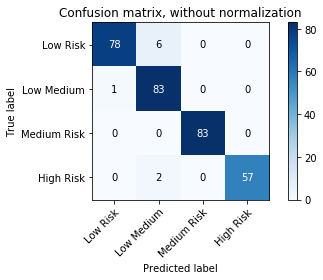

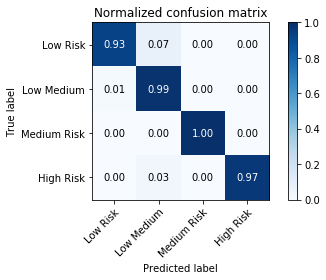

In [71]:
#AdaBoosting on Decision Tree.
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(criterion='entropy',max_depth = 7)
AdaBoost = AdaBoostClassifier(base_estimator=model ,n_estimators=400 ,learning_rate=1)
#fitting the model
AdaBoost.fit(x_train,y_train)
predict=AdaBoost.predict(x_test)

print("Training Accuracy :", AdaBoost.score(x_train, y_train))
print("Testing Accuracy :", AdaBoost.score(x_test, y_test))

cr = classification_report(y_test, predict)
print(cr)




def plot_confusion_matrix(y_test, predict, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_test, predict)
    # Only use the labels that appear in the data
  #  classes = classes[unique_labels(y_test, result)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

class_names = ['Low Risk', 'Low Medium', 'Medium Risk', 'High Risk']
# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, predict, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, predict, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [72]:
from sklearn.externals import joblib
joblib.dump(AdaBoost,"DTB_joblib_model")
dtb = joblib.load("DTB_joblib_model")
dtb

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='entropy',
                                                         max_depth=7,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                          

In [73]:
dtb.predict([[61179.69784,28203.0427,8307.623411,3537.748121,1037.956093,127.23433,224.658083,
             126.923191,104.528772,54.341252,60143.67343,27770.94724,8037.544564,3504.313082,
             1033.974274,60718.2284,30889.89276,8472.828091,3848.114634,1059.151722,60040.28807,
             28187.72559,8145.875834,3558.041281,1045.208838]])

array([1], dtype=int64)

In [74]:
# importing ML Explanability Libraries


#for purmutation importance
import eli5 
from eli5.sklearn import PermutationImportance

#for SHAP values
import shap 
from pdpbox import pdp, info_plots #for partial plots

In [75]:
perm = PermutationImportance(AdaBoost, random_state = 0).fit(x_test, y_test)
eli5.show_weights(perm, feature_names = x_test.columns.tolist())

Weight,Feature
0.0290 ± 0.0182,Pz_LOW_BETA
0.0284 ± 0.0111,Pz_ALPHA
0.0284 ± 0.0095,Pz_THETA
0.0123 ± 0.0048,T8_THETA
0.0103 ± 0.0103,Pz_HIGH_BETA
0.0090 ± 0.0048,Pz_GAMMA
0.0071 ± 0.0026,T7_LOW_BETA
0.0071 ± 0.0063,AF4_THETA
0.0058 ± 0.0063,T7_THETA
0.0045 ± 0.0032,AF3_ALPHA


In [76]:
predict

array([4, 1, 4, 3, 1, 2, 2, 4, 4, 4, 4, 2, 3, 3, 1, 2, 1, 1, 3, 3, 2, 1,
       4, 1, 1, 1, 3, 2, 3, 1, 1, 3, 3, 4, 3, 2, 4, 4, 2, 2, 2, 4, 3, 1,
       2, 1, 1, 4, 4, 3, 2, 2, 2, 1, 2, 3, 1, 1, 2, 4, 2, 4, 3, 2, 2, 3,
       2, 3, 4, 2, 1, 3, 2, 2, 1, 3, 2, 3, 3, 2, 1, 1, 1, 2, 4, 4, 4, 4,
       1, 1, 1, 2, 1, 4, 3, 4, 2, 2, 4, 2, 1, 1, 1, 4, 2, 3, 3, 2, 3, 3,
       4, 1, 4, 3, 2, 2, 2, 1, 1, 2, 1, 4, 1, 3, 1, 1, 1, 3, 2, 1, 2, 3,
       3, 3, 1, 3, 2, 2, 1, 1, 3, 3, 3, 1, 4, 1, 1, 3, 2, 2, 4, 1, 1, 1,
       2, 4, 2, 3, 1, 1, 3, 2, 2, 3, 4, 3, 2, 3, 1, 1, 2, 3, 2, 4, 2, 1,
       3, 2, 4, 2, 3, 2, 2, 3, 3, 4, 1, 1, 1, 3, 1, 3, 2, 2, 4, 4, 4, 3,
       2, 1, 4, 3, 1, 1, 1, 3, 2, 3, 4, 2, 4, 2, 2, 4, 4, 2, 2, 2, 3, 3,
       3, 2, 1, 2, 2, 3, 2, 4, 4, 4, 2, 3, 4, 2, 2, 1, 1, 3, 2, 2, 2, 1,
       3, 2, 4, 4, 4, 2, 3, 1, 3, 2, 2, 1, 3, 2, 2, 3, 3, 3, 3, 1, 2, 2,
       4, 4, 1, 3, 4, 2, 2, 1, 1, 4, 1, 3, 2, 1, 2, 3, 3, 1, 3, 1, 1, 4,
       3, 3, 2, 4, 3, 3, 2, 3, 4, 3, 3, 1, 1, 3, 2,